In [14]:
##Librerias

import matplotlib.pyplot as plt  # gráficos
import pandas as pd ### para manejo de datos
import a_funciones as funciones  ###archivo de funciones propias
import numpy as np #procesamiento eficiente de grandes conjuntos de datos y la realización de operaciones matemáticas
import io
import requests

In [15]:
### Lectura de datos

df = pd.read_csv("https://raw.githubusercontent.com/andressj1/A-RH/main/Bases/basefinal.csv", sep=",")

## **Eliminar las variables mencionadas por correlacion**

In [16]:
#Eliminación de variables

df.drop(["YearsWithCurrManager"], axis=1, inplace=True)
df.drop(["TotalWorkingYears"], axis=1, inplace=True)
df.drop(["YearsSinceLastPromotion"], axis=1, inplace=True)



## **Tratamiento de atipicos**

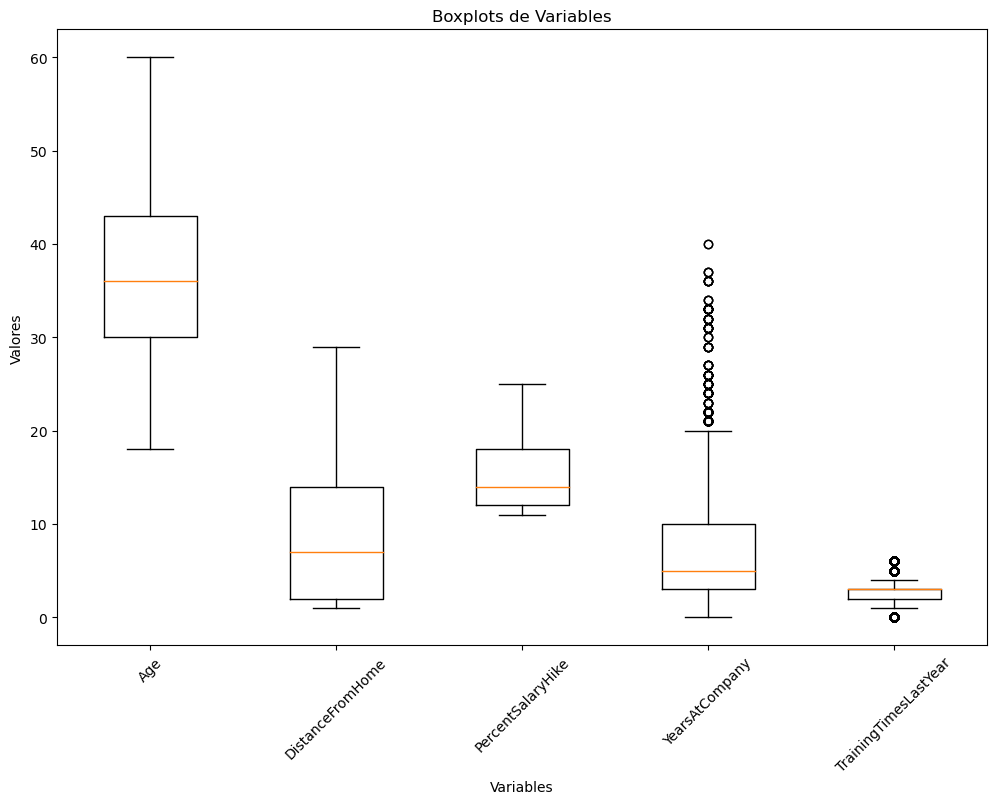

In [17]:
#Caja de bigotes de las variables numericas, menos salario 

variables = ['Age', 'DistanceFromHome', 'PercentSalaryHike', 
             'YearsAtCompany', 'TrainingTimesLastYear']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Crear los boxplots
ax.boxplot(df[variables].values, labels=variables)

# Configurar el título y las etiquetas
ax.set_title('Boxplots de Variables')
ax.set_xlabel('Variables')
ax.set_ylabel('Valores')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar la imagen
plt.show()

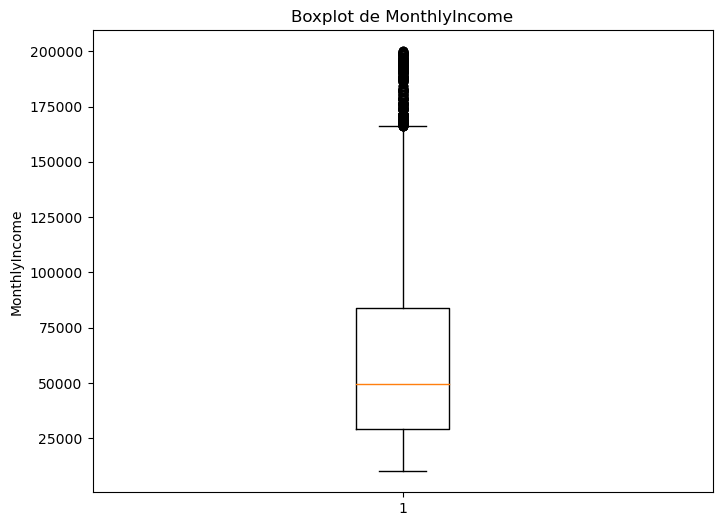

In [18]:
#Caja de bigotes del salario

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el boxplot de MonthlyIncome
ax.boxplot(df['MonthlyIncome'])
ax.set_title('Boxplot de MonthlyIncome')
ax.set_ylabel('MonthlyIncome')

# Mostrar la figura
plt.show()

In [19]:
"""Se trataran los atipicos de yearsatcompany, ya que es una de las variables que mas presenta atipicos, y
cuenta con un numero de categorias trabajable """

'Se trataran los atipicos de yearsatcompany, ya que es una de las variables que mas presenta atipicos, y\ncuenta con un numero de categorias trabajable '

In [20]:
####### Para  
df['YearsAtCompany'].value_counts()

5     583
1     492
3     379
2     377
10    357
4     324
7     268
9     246
8     238
6     224
0     125
11     96
20     81
13     72
15     59
14     54
22     45
12     42
21     42
18     39
16     35
19     33
17     26
24     18
33     14
26     12
25     12
31      9
32      8
29      6
27      6
36      6
23      6
34      3
30      3
37      3
40      2
Name: YearsAtCompany, dtype: int64

In [21]:
"""Las categorias 40, 37, 36, 34, 33, 32, 31 en total me suman 98 datos, que a comparacion del total
son muy pocos, seria una imputacion solo a valores extremos"""

'Las categorias 40, 37, 36, 34, 33, 32 en total me suman 67 datos, que a comparacion del total\nson muy pocos, seria una imputacion solo a valores extremos'

In [22]:
##

df = df[df['YearsAtCompany'] < 31.0]

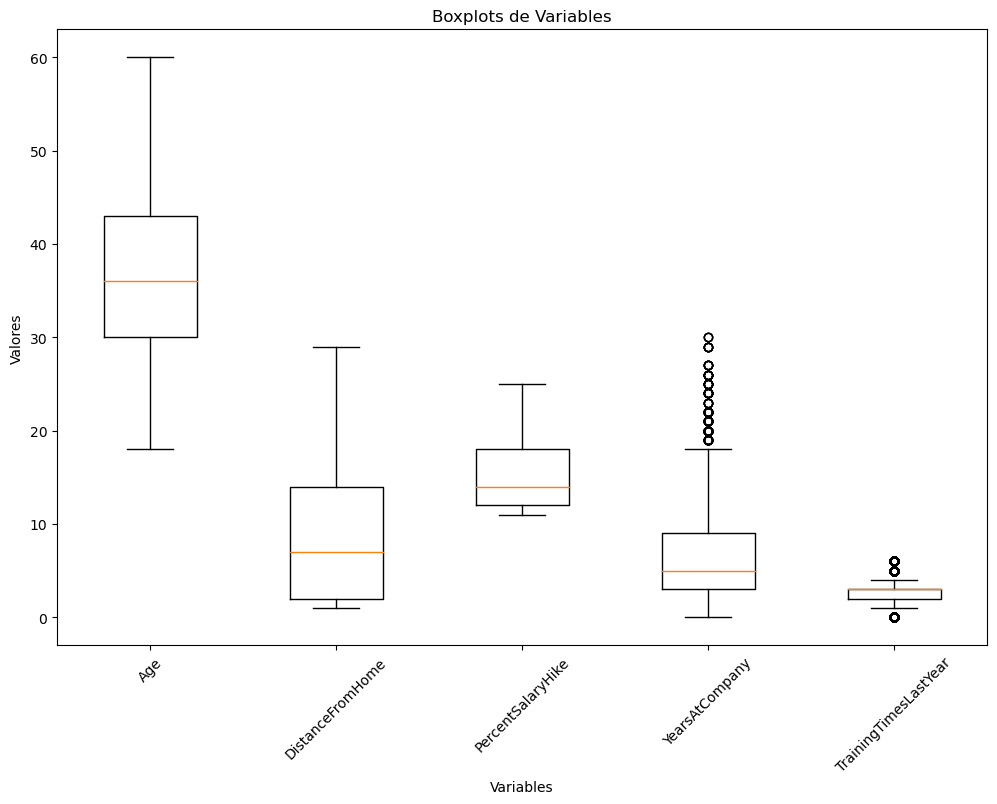

In [23]:
variables = ['Age', 'DistanceFromHome', 'PercentSalaryHike', 
             'YearsAtCompany', 'TrainingTimesLastYear']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Crear los boxplots
ax.boxplot(df[variables].values, labels=variables)

# Configurar el título y las etiquetas
ax.set_title('Boxplots de Variables')
ax.set_xlabel('Variables')
ax.set_ylabel('Valores')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar la imagen
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4344
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4300 non-null   float64
 1   JobSatisfaction          4300 non-null   float64
 2   WorkLifeBalance          4300 non-null   float64
 3   Age                      4300 non-null   int64  
 4   BusinessTravel           4300 non-null   object 
 5   Department               4300 non-null   object 
 6   DistanceFromHome         4300 non-null   int64  
 7   Education                4300 non-null   int64  
 8   EducationField           4300 non-null   object 
 9   Gender                   4300 non-null   object 
 10  JobLevel                 4300 non-null   int64  
 11  JobRole                  4300 non-null   object 
 12  MaritalStatus            4300 non-null   object 
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked      

## **Tranformacion de variables**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4344
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4300 non-null   float64
 1   JobSatisfaction          4300 non-null   float64
 2   WorkLifeBalance          4300 non-null   float64
 3   Age                      4300 non-null   int64  
 4   BusinessTravel           4300 non-null   object 
 5   Department               4300 non-null   object 
 6   DistanceFromHome         4300 non-null   int64  
 7   Education                4300 non-null   int64  
 8   EducationField           4300 non-null   object 
 9   Gender                   4300 non-null   object 
 10  JobLevel                 4300 non-null   int64  
 11  JobRole                  4300 non-null   object 
 12  MaritalStatus            4300 non-null   object 
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked      

In [26]:
# Convertir las variables float a tipo entero
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype(int)
df['JobSatisfaction'] = df['JobSatisfaction'].astype(int)
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype(int)
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype(int)
df['TotalWorkingYears'] = df['TotalWorkingYears'].astype(int)


KeyError: 'TotalWorkingYears'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4284 entries, 0 to 4344
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EnvironmentSatisfaction  4284 non-null   int32 
 1   JobSatisfaction          4284 non-null   int32 
 2   WorkLifeBalance          4284 non-null   int32 
 3   Age                      4284 non-null   int64 
 4   BusinessTravel           4284 non-null   object
 5   Department               4284 non-null   object
 6   DistanceFromHome         4284 non-null   int64 
 7   Education                4284 non-null   int64 
 8   EducationField           4284 non-null   object
 9   Gender                   4284 non-null   object
 10  JobLevel                 4284 non-null   int64 
 11  JobRole                  4284 non-null   object
 12  MaritalStatus            4284 non-null   object
 13  MonthlyIncome            4284 non-null   int64 
 14  NumCompaniesWorked       4284 non-null  

In [ ]:
df.to_csv(r'C:\Users\luisa\OneDrive\Desktop\Analitica lll RH\Bases\df_fin.csv', index=False)